
## Image Classification using CNN


## Aim: To effectively classify the Images of Dogs and Cats using a basic CNN model
## Dataset: Images of Cats and Dogs


## Loading the libraries

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import splitfolders
import tensorflow as tf

In [ ]:
from google.colab.patches import cv2_imshow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D,  Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from collections import Counter
from keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix

## Using the Split-Folder function to retrieve the folders from the drive and split them into train-test-valid dataset in the ratio 80,10,10 respectively.

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/dataset classification", output = "/content/drive/MyDrive/Classification_split", ratio = (0.8,0.1,0.1))


Copying files: 428 files [00:05, 79.68 files/s]


## Using the ImageDataGenerator Class to retrieve the images from the split folders.
* Performed Data Augmentation on the training images.
* All the images have been resized to 256*256 pixels

In [ ]:
train_datagen = ImageDataGenerator(
                                   rotation_range = 45,
                                   shear_range =0.2,
                                   zoom_range =0.2,
                                   horizontal_flip =True)
train_dataset = train_datagen.flow_from_directory("/content/drive/MyDrive/Classification_split/train",
                                                  target_size = (256,256),
                                                  batch_size =32,
                                                  shuffle=True,
                                                  class_mode="categorical")
X_train, y_train  = train_dataset.next()

test_datagen = ImageDataGenerator()
test_dataset = test_datagen.flow_from_directory("/content/drive/MyDrive/Classification_split/test",
                                                target_size=  (256,256),
                                                batch_size=32,
                                                shuffle =True,
                                                 class_mode="categorical")
X_test, y_test = train_dataset.next()


valid_datagen = ImageDataGenerator()
valid_dataset = valid_datagen.flow_from_directory("/content/drive/MyDrive/Classification_split/val",
                                                  target_size= (256,256),
                                                  batch_size =32,
                                                  shuffle =True,
                                                   class_mode="categorical")
X_val, y_val = valid_dataset.next()


Found 342 images belonging to 3 classes.
Found 44 images belonging to 3 classes.
Found 42 images belonging to 3 classes.


## Number of classes in the dataset and their corresponding labels

In [ ]:
print("Number of Classes in the Dataset: ", train_dataset.num_classes)
print("Class Labels: ", train_dataset.class_indices)

Number of Classes in the Dataset:  3
Class Labels:  {'cats': 0, 'dogs': 1, 'tiger': 2}


## Number of images of each class in each train, test and validation folders

In [ ]:
train_counter = Counter(train_dataset.classes)
test_counter =Counter(test_dataset.classes)
val_counter =Counter(valid_dataset.classes)
print("Number of Images in each Class:")
print("Train: ", train_counter)
print("Test: ", test_counter)
print("Valid: ", val_counter)

Number of Images in each Class:
Train:  Counter({0: 144, 2: 120, 1: 78})
Test:  Counter({0: 18, 2: 15, 1: 11})
Valid:  Counter({0: 18, 2: 15, 1: 9})


## Shapes of the Images

In [ ]:
train_dataset.image_shape, test_dataset.image_shape, valid_dataset.image_shape

((256, 256, 3), (256, 256, 3), (256, 256, 3))

## Sample Images

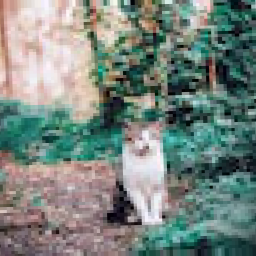

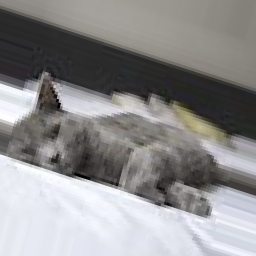

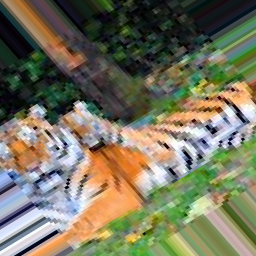

In [ ]:
for i in range(3):
  image = X_train[i]
  img =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
  cv2_imshow(img)


## Model Building - A basic CNN model:
* With 3-convolution layers followed by Maxpooling
* And a fully connected layer with three dense layers.
* We have used a kernel of size 3*3 and relu activation. The activation of the output layer is the softmax function

In [ ]:
model =Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ="relu", input_shape =(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "relu"))
model.add(MaxPooling2D())
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation ="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(84, activation ="relu"))
model.add(Dense(3 , activation ="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

## Early Stopping
* We have used the early stopping method to track the Validation Loss. It will keep a check on the Validation Loss and when the loss is minimum at a point, it will track it for the next 10 epochs (As I have given *patience* for 10 epochs)  and if that was the minimum loss obtained at that marked point, then the training stops,

In [ ]:
early_stopping = EarlyStopping(monitor ="val_loss", mode = "min", patience =10)

In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics ="accuracy")
history = model.fit(X_train, y_train,validation_data = (X_val, y_val) , epochs = 50,callbacks=early_stopping)

Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 15.6099 - accuracy: 0.3125 - val_loss: 2164.1313 - val_accuracy: 0.4062
Epoch 2/50
1/1 [==============================] - 6s 6s/step - loss: 1778.7330 - accuracy: 0.4062 - val_loss: 1074.2527 - val_accuracy: 0.1875
Epoch 3/50
1/1 [==============================] - 10s 10s/step - loss: 878.0965 - accuracy: 0.2812 - val_loss: 265.8865 - val_accuracy: 0.3438
Epoch 4/50
1/1 [==============================] - 7s 7s/step - loss: 191.2997 - accuracy: 0.6250 - val_loss: 85.3826 - val_accuracy: 0.4062
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 59.2306 - accuracy: 0.6562 - val_loss: 24.3713 - val_accuracy: 0.1875
Epoch 6/50
1/1 [==============================] - 8s 8s/step - loss: 16.9463 - accuracy: 0.3125 - val_loss: 22.7813 - val_accuracy: 0.4062
Epoch 7/50
1/1 [==============================] - 6s 6s/step - loss: 27.6634 - accuracy: 0.3750 - val_loss: 34.7341 - val_accuracy: 0.4062
Epoch 8/50
1/1

## Model Evaluation

In [ ]:
loss, accuracy =model.evaluate(X_train, y_train)
print("Train Loss: ", round(loss,2), "Train Accuracy: ", round(accuracy,2))

1/1 [==============================] - 2s 2s/step - loss: 0.0010 - accuracy: 1.0000
Train Loss:  0.0 Train Accuracy:  1.0


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss: ", round(loss, 2), "Test Accuracy: ", round(accuracy, 2))

1/1 [==============================] - 3s 3s/step - loss: 2.8725 - accuracy: 0.3750
Test Loss:  2.87 Test Accuracy:  0.38


In [ ]:
prediction = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


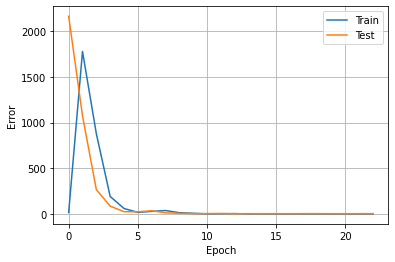

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

## Testing

In [ ]:
def test_image(img):
  test_image = cv2.resize(img, (256,256))
  test_image =test_image.reshape(-1,256,256,3)

  test_prediction = model.predict(test_image, verbose = 0)
  print("\nOriginal Labels: ", train_dataset.class_indices)
  return "Predicted Class:",np.argmax(test_prediction)


Test Image - DOG


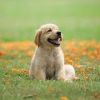


Original Labels:  {'cats': 0, 'dogs': 1, 'tiger': 2}


('Predicted Class:', 0)

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Classification_split/test/dogs/dog5.jpg")
print("\nTest Image - DOG")
cv2_imshow(image)
test_image(image)


Test Image - CAT


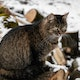


Original Labels:  {'cats': 0, 'dogs': 1, 'tiger': 2}


('Predicted Class:', 2)

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Classification_split/test/cats/pexels-irina-iriser-4021859.jpg")
print("\nTest Image - CAT")
cv2_imshow(image)
test_image(image)


Test Image - TIGER


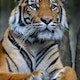


Original Labels:  {'cats': 0, 'dogs': 1, 'tiger': 2}


('Predicted Class:', 2)

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Classification_split/test/tiger/pexels-jiří-mikoláš-6278664.jpg")
print("\nTest Image - TIGER")
cv2_imshow(image)
test_image(image)


Test Image - TIGER


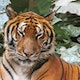


Original Labels:  {'cats': 0, 'dogs': 1, 'tiger': 2}


('Predicted Class:', 0)

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Classification_split/test/tiger/pexels-mehmet-turgut-kirkgoz-11854182.jpg")
print("\nTest Image - TIGER")
cv2_imshow(image)
test_image(image)


Test Image - DOG


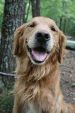


Original Labels:  {'cats': 0, 'dogs': 1, 'tiger': 2}


('Predicted Class:', 0)

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Classification_split/test/dogs/images (20).jpg")
print("\nTest Image - DOG")
cv2_imshow(image)
test_image(image)

## Conclusion:
 * We had fit the model for 50 epochs, since the early stopping was based on the Validation Loss, the model was trained for 23 epochs. The minimum validation loss was 1.39 at the 13th epoch. It kept a track on the validation loss for the next 10 epochs and since 1.39 was the minimum loss obtained even after 10 epochs, the training stopped. We have obtained an accuracy of 100% on the train dataset and 38% on the test data. From the loss plot, we can infer that the model isn't overfitting. Only one out of the five images were classified correctly.